<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In this project I'm planning to explore the relationship among a country's HDI and its gender development and gender inequality condition. My hypothesis is the country with higher scores in gender development and lower scores in gender inequality will have a higher score in HDI.

Sources from: https://hdr.undp.org/data-center/documentation-and-downloads


In [85]:
ur1="https://github.com/XiaoLiang28/Xiao/blob/main/hdi.xlsx"

In [86]:
hdi = pd.read_excel(ur1,header=0)

ValueError: ignored

In [ ]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Development.xlsx","gender development.xlsx")

('gender development.xlsx', <http.client.HTTPMessage at 0x7f0a06b7ac10>)

In [75]:
development=pd.read_excel("gender development.xlsx")

ValueError: ignored

In [62]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Inequality.xlsx","gender inequality.xlsx")

('gender inequality.xlsx', <http.client.HTTPMessage at 0x7f0a03210370>)

In [63]:
inequality=pd.read_excel("gender inequality.xlsx")

ValueError: ignored

In [64]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/dataset.csv","dataset.csv")

('dataset.csv', <http.client.HTTPMessage at 0x7f0a03210d60>)

In [65]:
data=pd.read_csv("https://github.com/XiaoLiang28/Xiao/blob/main/dataset.csv")

ParserError: ignored

In [66]:
urllib.request.urlretrieve("https://github.com/XiaoLiang28/Xiao/blob/main/Edu2020.xlsx?raw=true","edu2020.xlsx")

('edu2020.xlsx', <http.client.HTTPMessage at 0x7f0a0323e790>)

In [67]:
edu2020=pd.read_excel('edu2020.xlsx')

In [68]:
edu2020

,State Name,Percent
0,Alabama,27.8
1,Alaska,31.9
2,Arizona,33.0
3,Arkansas,24.9
4,California,36.9
5,Colorado,44.2
6,Connecticut,42.4
7,Delaware,34.7
8,District of Columbia,63.6
9,Florida,33.7


In [69]:
edu2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State Name  51 non-null     object 
 1   Percent     51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


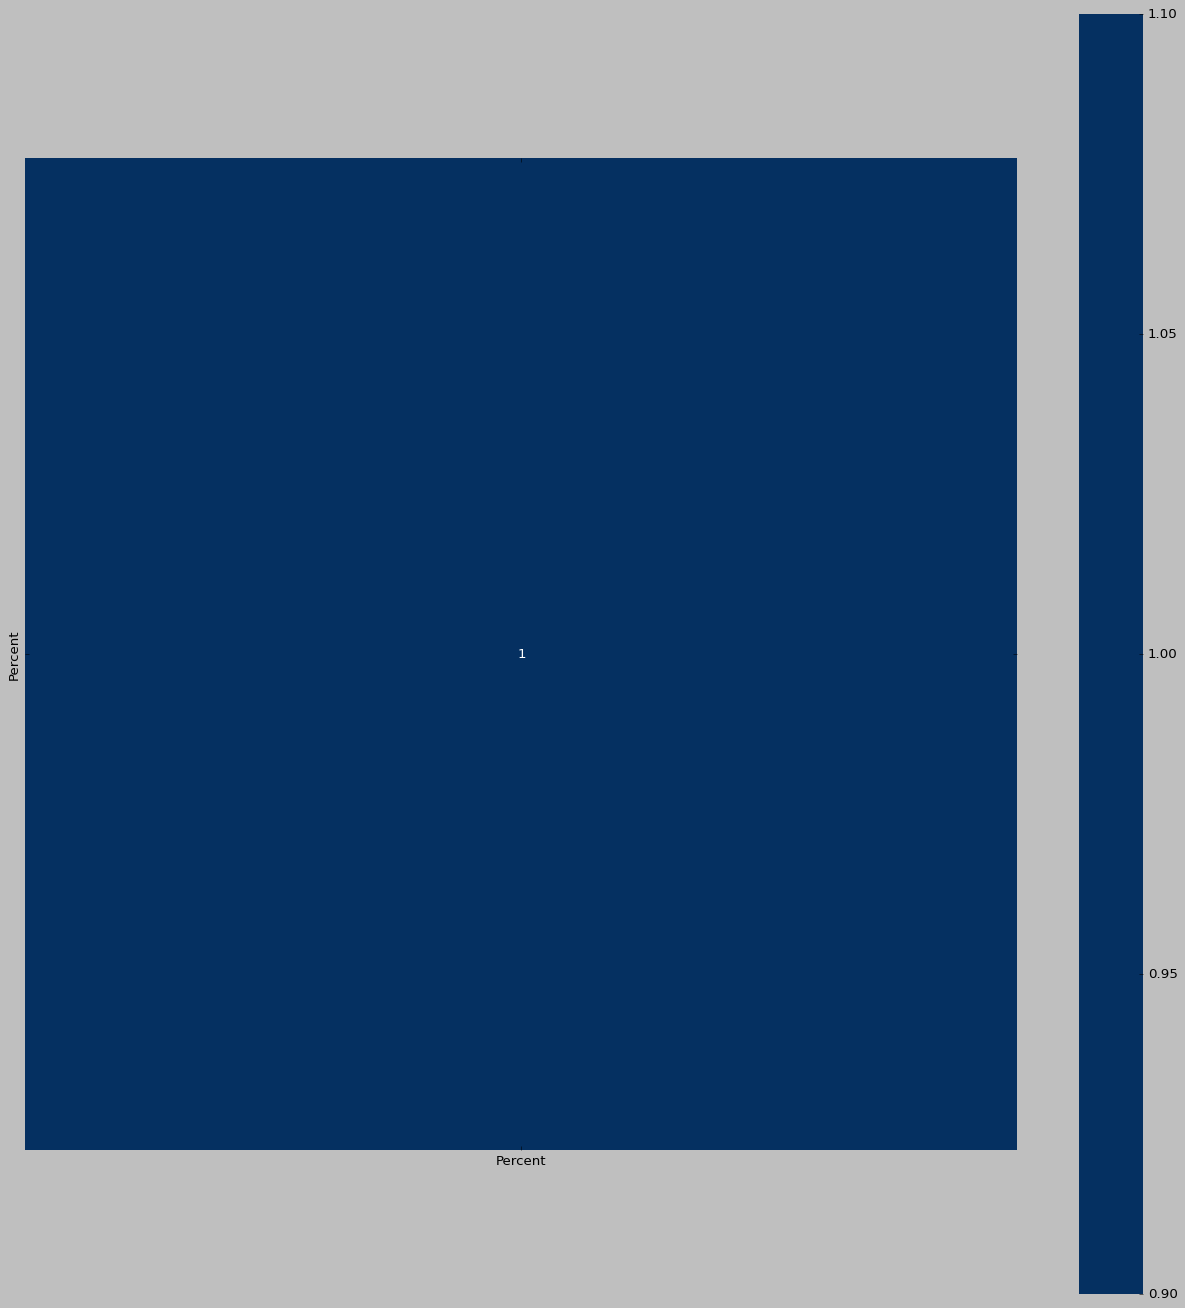

In [71]:
corrmat =edu2020.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(corrmat, cmap = "RdBu", square = True, annot = True, center = 0);

<Figure size 480x320 with 0 Axes>

<BarContainer object of 1 artists>

Text(0.5, 1.0, 'edu2020-state')

Text(0.5, 0, 'Percent')

Text(0, 0.5, 'State Name')

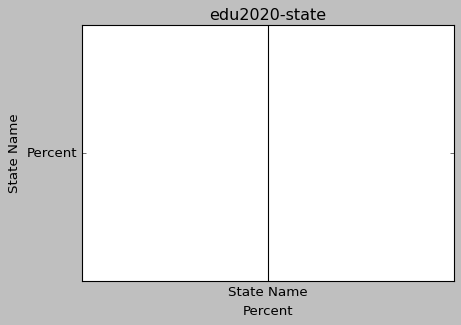

In [82]:
plt.figure(figsize=(6,4))
plt.barh('Percent', width='State Name', height=0.2)
plt.title('edu2020-state')
plt.xlabel('Percent')
plt.ylabel('State Name')